$$\mathbf{\text{Tarea 1. Seminario Machine Learning Estadística 1.}}$$

$\text{Adame Serrano Eduardo}$

$\text{No.cta. 316149350}$

$\text{Correo. adamesaurio@ciencias.unam.mx}$

 $\mathbf{\text{Ejercicio 2.}}$
 
De la base `data_schools` sacar/obtener el error estándar con Bootstrap de las variables de la base. Recordemos que tienen que simular $N$ Muestras Boostrap con tamaño $n$. Luego, el otro ejercicio es que lo hagan con $n-1$.

Además grafique los histogramas de las correlacionesy el histograma sobre una muestra bostrap considerando la muestra completa.

$\mathbf{\text{Solución.}}$

In [2]:
#import sqlite3
import sqldf
import pandas as pd
from pylab import*
import numpy as np
import scipy.stats 
from scipy.special import gamma
import seaborn as sns
from scipy.stats import beta
from scipy.stats import spearmanr
import pandas as pd

In [26]:
ruta="C:/Users/leon/Documents/Libros/7mo/Seminario Estadística 1/Tareas/Tarea 1. Seminario Machine Learning/"
bd="data_schools.xlsx"
bd_escuelas=pd.read_excel(ruta+bd)
bd_escuelas

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09
...,...,...,...
77,78,590,3.15
78,79,558,2.81
79,80,611,3.16
80,81,564,3.02


In [27]:
#Seleccionamos aleatoriamente 15 escuelas
escuelas_random=bd_escuelas.sample(n=15,random_state=9998)#[["escuela"]]
escuelas_random["f_seleccion"]=1
print(escuelas_random) 

    escuela  LSAT   GPA  f_seleccion
37       38   606  3.20            1
51       52   580  3.07            1
75       76   608  3.16            1
5         6   576  3.39            1
73       74   565  3.15            1
21       22   614  3.19            1
57       58   631  3.21            1
10       11   558  3.11            1
35       36   572  2.88            1
39       40   535  2.98            1
47       48   562  3.19            1
68       69   598  3.20            1
61       62   637  3.33            1
76       77   595  3.19            1
36       37   615  3.37            1


La variable `f_seleccion` será un identificador para las escuelas seleccionadas aleatoriamente de las que no fueron seleccionadas 

In [28]:
bd_escuelas=pd.merge(bd_escuelas, escuelas_random, how="left", on=["escuela", "LSAT" , "GPA"])
bd_escuelas["f_seleccion"]=bd_escuelas["f_seleccion"].fillna(0)
bd_escuelas["f_seleccion"]=bd_escuelas["f_seleccion"].astype(int)
bd_escuelas

,escuela,LSAT,GPA,f_seleccion
0,1,622,3.23,0
1,2,542,2.83,0
2,3,579,3.24,0
3,4,653,3.12,0
4,5,606,3.09,0
...,...,...,...,...
77,78,590,3.15,0
78,79,558,2.81,0
79,80,611,3.16,0
80,81,564,3.02,0


En este caso la variable `f_seleccion` será un identificador para las escuelas que no fueron seleccionadas.

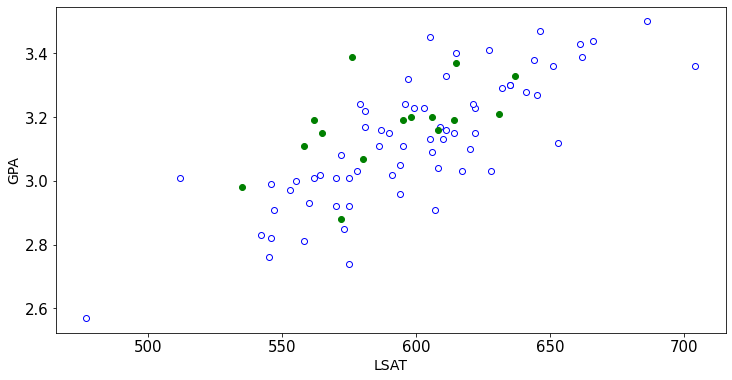

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
plot(bd_escuelas[bd_escuelas["f_seleccion"]==0].LSAT, 
         bd_escuelas[bd_escuelas["f_seleccion"]==0].GPA, 'o', color='blue',markerfacecolor='white')
plot(bd_escuelas[bd_escuelas["f_seleccion"]==1].LSAT, 
         bd_escuelas[bd_escuelas["f_seleccion"]==1].GPA, 'o', color='green')
fig.title = "Dispersión"

xlabel("LSAT",size=14)
ylabel("GPA",size=14)
xticks(fontsize=15)
yticks(fontsize=15)
show()

In [303]:
corr1, _ = spearmanr(bd_escuelas[bd_escuelas["f_seleccion"]==1].LSAT, bd_escuelas[bd_escuelas["f_seleccion"]==1].GPA)
print('Coeficiente de correlación de Spearman para los datos aleatorios: %.3f' % corr1)

Coeficiente de correlación de Spearman para los datos aleatorios: 0.648


In [304]:
corr, _ = spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)
print('Coeficiente de correlación de Spearman para los datos en general: %.3f' % corr)

Coeficiente de correlación de Spearman para los datos en general: 0.753


Como sabe, el error estándar = desviación estándar / raíz cuadrada del número total de muestras 

In [305]:
def funcion_corr(N,m,bd,var1,var2,remp): #N: número de muestras, m: tamaño de las muestras, bd: Base en cuestión, var1: Variable 1, var2: Variable 2, remp: Permitir o no permitir el muestreo de la misma fila más de una vez.
    corr_=np.array([]) # vacío
    for i in range(0,N):
        bd_muestras=bd.sample(n=m,replace=remp)
        corr,_=spearmanr(bd_muestras[var1],bd_muestras[var2])
        corr_ = np.append(corr_,corr)
    return corr_    

In [306]:
vector_corr_n=funcion_corr(100,15,bd_escuelas,'LSAT','GPA',False)

Lo anterior nos genera un vector de correlaciones de 100 muestras para un tamaño por muestra de 15 observaciones. 

In [307]:
vector_corr_n

array([0.83646146, 0.90437927, 0.66786275, 0.40714286, 0.77926751,
       0.85      , 0.86135957, 0.85867621, 0.7484336 , 0.88829347,
       0.58908001, 0.79248658, 0.49821109, 0.73928571, 0.69705122,
       0.65443178, 0.83288684, 0.83005367, 0.67054637, 0.83214286,
       0.78571429, 0.71428571, 0.61840954, 0.89525551, 0.56836484,
       0.79248785, 0.72142857, 0.925     , 0.44305378, 0.70725412,
       0.73928571, 0.84897264, 0.55835189, 0.7802769 , 0.34619182,
       0.8470483 , 0.77569289, 0.88571429, 0.78245582, 0.67084186,
       0.83467415, 0.81989379, 0.58139535, 0.78571429, 0.64700651,
       0.65890805, 0.75424516, 0.85509976, 0.4686941 , 0.6624912 ,
       0.55874462, 0.82975044, 0.60411105, 0.87713322, 0.70008981,
       0.77280982, 0.58802526, 0.84285714, 0.91331582, 0.74642857,
       0.89723003, 0.81003584, 0.8436107 , 0.69285714, 0.67204301,
       0.80714286, 0.75559565, 0.73792487, 0.88093142, 0.71849895,
       0.76386527, 0.81428571, 0.81680104, 0.53798055, 0.70304

$\mathbf{\text{Error estándar de las correlaciones para los datos generales}}$

Calculando la desviación estandar del vector de correlaciones `vector_corr` se tiene lo siguiente 

In [308]:
desviacion_n = np.std(vector_corr)
desviacion_n

0.12181863931941335

Ahora calculemos su error estándar dado por 

In [309]:
errors_n = desviacion_n / np.sqrt(100)
errors_n

0.012181863931941334

$\mathbf{\text{Mostrar para que $n < 82$ la precisión de la correlación del muestro se parece con respecto a la correlación de la muestra total}}$

Recuerde usted que bajo el término genérico de *ley de los grandes números* se engloban varios teoremas que describen el comportamiento del promedio de una sucesión de variables aleatorias conforme aumenta su número de ensayos. Por tanto, generamos un vector de correlaciones de $N=100$ muestras para un tamaño por muestra de $m=55$ observaciones.

In [310]:
vector_corr_n=funcion_corr(100,55,bd_escuelas,'LSAT','GPA',False)

Y simplemente calculamos su media la cual deberá ser aproximadamente 0.753

In [311]:
np.mean(vector_corr_n)

0.7522044454795632

Es decir, que para $n \approx 55$ la precisión de la correlación de los muestreo se parece a la correlación de la muestra total.

$\textbf{Grafique los histogramas de las correlaciones}$


Histograma para las correlaciones de la primer muestra aleatoria tomada de la base de datos con el identificador 1

In [347]:
def hist_corr(corr_,corr1):
    fig, ax = plt.subplots(figsize=(9,6))
    hist(corr_,bins=50,alpha=0.5,edgecolor="white",label="Corr Boostrap")
    axvline(x=corr1,color='red', linestyle='--',linewidth=3,label="Correlacion sin boostrap")
    axvline(x=np.mean(corr_),color='cyan', linestyle='--',linewidth=3,label="correlación Boostrap$")

    axvline(percentile(corr_,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
    axvline(percentile(corr_,97.5),color="blue",linestyle="--",linewidth=2) 
    show()
    print("Correlación sin Bootstrap de color rojo:", corr1)
    print("Promedio de la correlación de las muestras Bootstrap en color cyan:", np.mean(corr_))
    print("( Percentil 1: ", percentile(corr_,2.5),", Percentil 3: ",percentile(corr_,97.5),")")

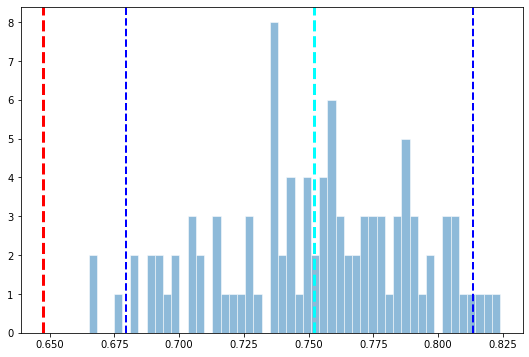

Correlación sin Bootstrap de color rojo: 0.647540143009093
Promedio de la Correlación de las muestras Bootstrap en color cyan: 0.7522044454795632
( Percentil 1:  0.679517981406021 , Percentil 3:  0.8134830609516942 )


In [343]:
hist_corr(vector_corr_n,corr1)

Histograma para las correlaciones de las variables de la base general

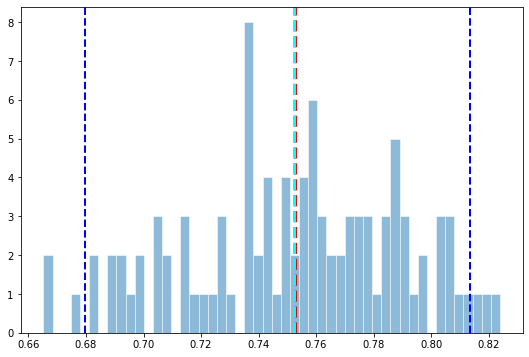

Correlación sin Bootstrap de color rojo: 0.7526621356232132
Promedio de la Correlación de las muestras Bootstrap en color cyan: 0.7522044454795632
( Percentil 1:  0.679517981406021 , Percentil 3:  0.8134830609516942 )


In [344]:
hist_corr(vector_corr_n,corr)

$\textbf{Grafique el  histograma pero sobre una muestra bostrap considerando la muestra completa}$

Generamos la muestra aleatoria de tamaño  $n$ = `len(bd_escuelas)`.


In [345]:
vector_corr_completa=funcion_corr(1,len(bd_escuelas),bd_escuelas,'LSAT','GPA',False)
vector_corr_completa

array([0.75266214])

Finalmente generamos el histograma solicitado

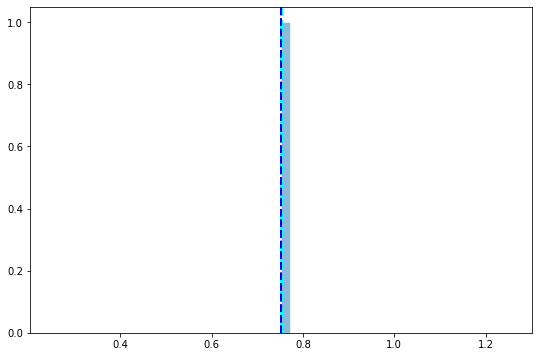

Correlación sin Bootstrap de color rojo: 0.7526621356232132
Promedio de la correlación de las muestras Bootstrap en color cyan: 0.7526621356232132
( Percentil 1:  0.7526621356232132 , Percentil 3:  0.7526621356232132 )


In [348]:
hist_corr(vector_corr_completa,corr)

$\blacklozenge$